# 3.1. Linear regression and Data preparation

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

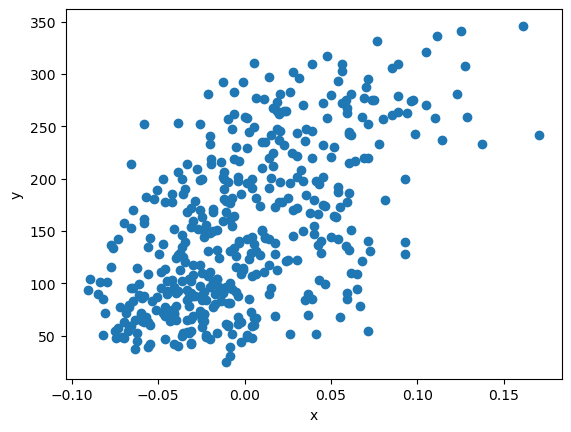

In [6]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
x = diabetes.data[:, 2]
y = diabetes.target

# 3.2 Graident discent

In [9]:
w = 1.0
b = 1.0

predicted value for first sample with initial w and b

In [10]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [11]:
def draw_point_line(i, j, w, b):
    plt.scatter(x[i:j+1], y[i:j+1])
    pt1 = (-0.1, -0.1 * w + b)
    pt2 = (0.15, 0.15 * w + b)
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

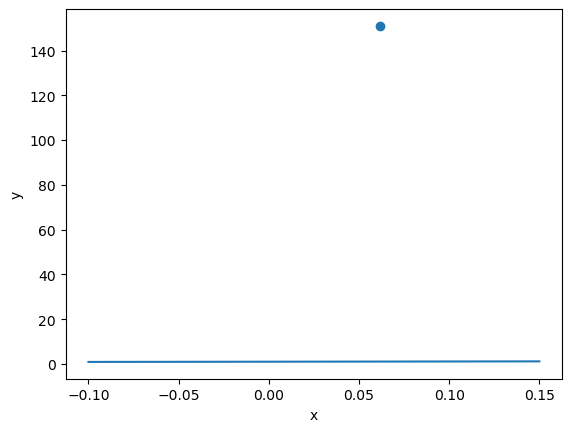

In [12]:
draw_point_line(0,0,w,b)

In [13]:
print(y[0])

151.0


In [14]:
# predicted value for first sample with incremented w
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [15]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) # ≈ d y_hat / d w at a point x[0]
print(w_rate) # w_rate tells two: to which direction and how much w should go

0.061696206518688734


In [16]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


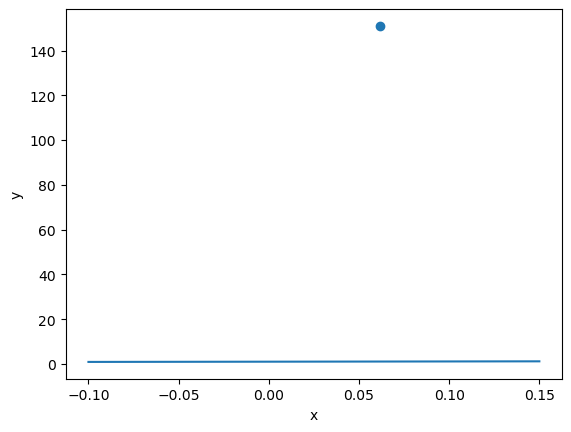

In [17]:
draw_point_line(0,0,w_new,b)

In [18]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
b_rate = (y_hat_inc - y_hat) / (b_inc - b) # ≈ d y_hat / d b at a point x[0]
print(b_rate)

1.0


In [19]:
b_new = b + 1
print(b_new)

2.0


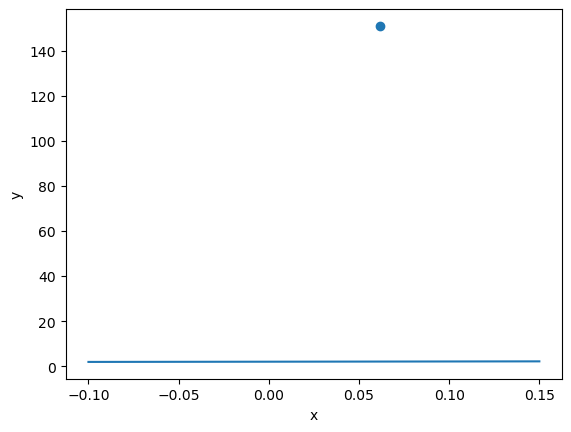

In [20]:
draw_point_line(0,0,w,b_new)

Two Problems: 
1. it gets closer to the point too slowly
2. it will only increse even after meeting the point

## Error Backpropagation

In [23]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err # 1 is b_rate
print(w_new, b_new)

10.250624555904514 150.9383037934813


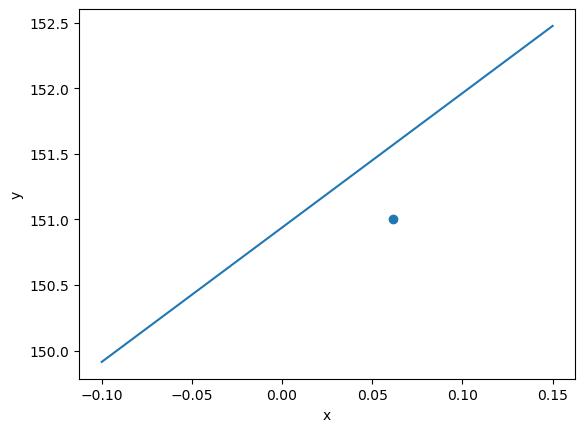

In [24]:
draw_point_line(0,0,w_new,b_new)

adjust params with the second data point

In [25]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


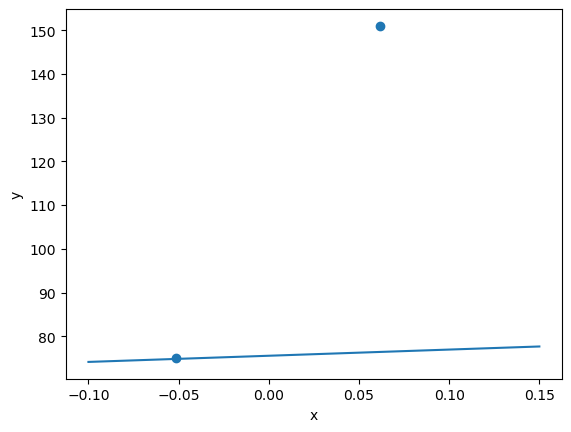

In [26]:
draw_point_line(0, 1, w_new, b_new)

iterate over all data points

In [27]:
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

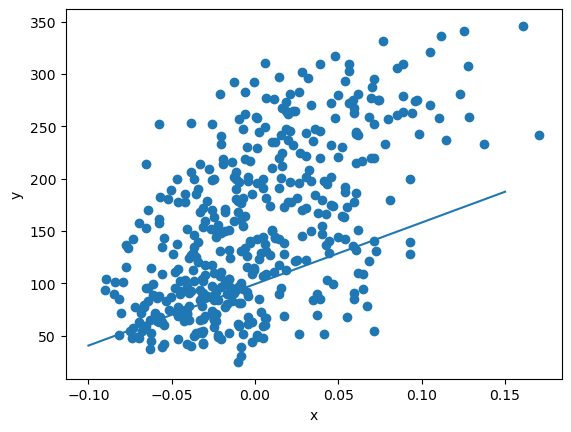

In [28]:
draw_point_line(0, len(x) + 1, w, b)

iterate whole process several times: epoch

In [29]:
for i in range(1, 100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

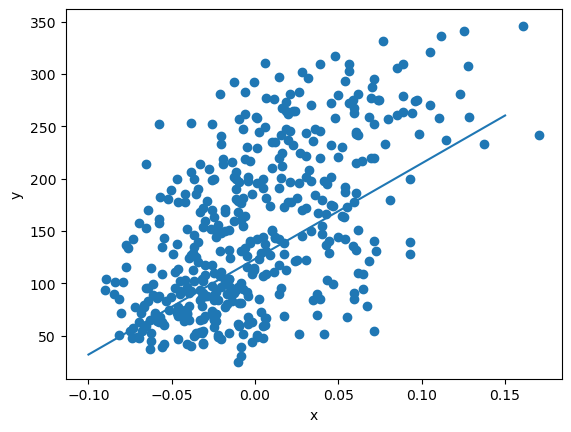

In [30]:
draw_point_line(0, len(x) + 1, w, b)

predict for new input

In [31]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


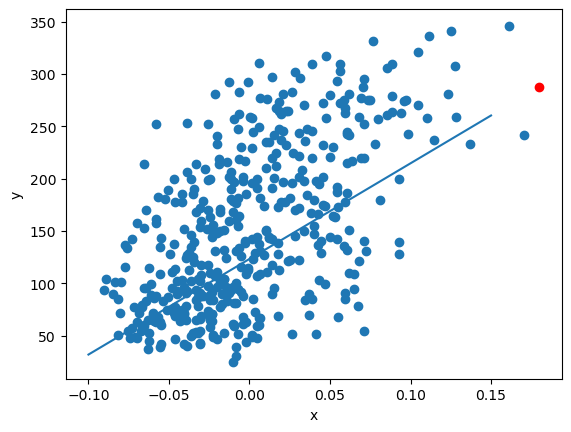

In [35]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred, c = "red")
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()